### Project on Netflix Titles

**Import Libaries and data**

In [1]:
import numpy as np # linear algebra operations
import pandas as pd # used for data preparation
import matplotlib.pyplot as  plt #used for data visualization
import seaborn as sns #used for data visualization


df = pd.read_csv(r'C:\Users\DELL\Downloads\net\netflix_titles.csv')


## Checking number of rows and columns in data

In [2]:
df.shape

(8807, 12)

# Checking content available in Dataset

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

#Taking the count of ratings available

### Remove unwanted columns

In [6]:
# Remove unwanted columns
df.drop(['date_added','cast','description'],axis=1,inplace=True)

In [7]:
# Check basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   country       7976 non-null   object
 5   release_year  8807 non-null   int64 
 6   rating        8803 non-null   object
 7   duration      8804 non-null   object
 8   listed_in     8807 non-null   object
dtypes: int64(1), object(8)
memory usage: 619.4+ KB
None


In [8]:
# Fill missing director with 'Unknown'
df['director'] = df['director'].fillna('Unknown')


In [9]:
# Check missing values
print(df.isnull().sum())

show_id           0
type              0
title             0
director          0
country         831
release_year      0
rating            4
duration          3
listed_in         0
dtype: int64


In [10]:
# Check unique values in categorical columns
print(df['type'].value_counts())
print(df['rating'].value_counts())

type
Movie      6131
TV Show    2676
Name: count, dtype: int64
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


### Data Cleaning Steps: Handle Missing Value

In [11]:
# Fill missing country with mode (most frequent)
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [12]:
# Extract duration numerical values
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)
df['duration_unit'] = df['duration'].str.extract('([a-zA-Z]+)')

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\DELL\AppData\Local\Temp\ipykernel_7140\2540322504.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)


In [13]:
df.head()

,show_id,type,title,director,country,release_year,rating,duration,listed_in,duration_num,duration_unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90 min,Documentaries,90.0,min
1,s2,TV Show,Blood & Water,Unknown,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2.0,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,United States,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",1.0,Season
3,s4,TV Show,Jailbirds New Orleans,Unknown,United States,2021,TV-MA,1 Season,"Docuseries, Reality TV",1.0,Season
4,s5,TV Show,Kota Factory,Unknown,India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2.0,Seasons


In [14]:
df.drop('duration',axis=1,inplace=True)

### Create Data Visualization

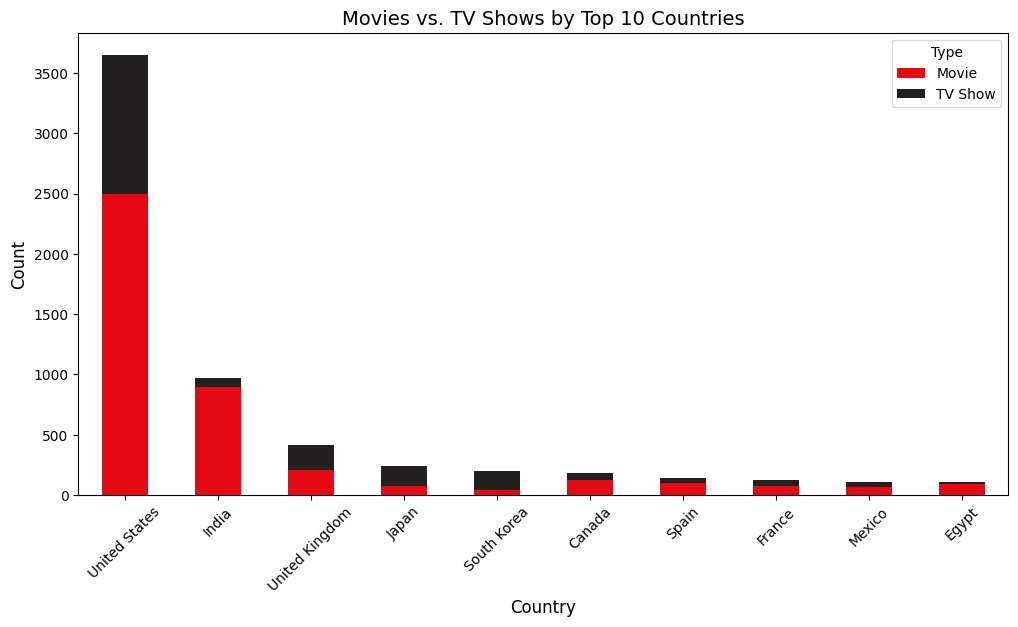

In [15]:
country_type = df.groupby(['country', 'type']).size().unstack().fillna(0)
top_countries = country_type.sum(axis=1).sort_values(ascending=False).head(10).index
country_type.loc[top_countries].plot(kind='bar', stacked=True, color=['#E50914', '#221F1F'], figsize=(12,6))
plt.title('Movies vs. TV Shows by Top 10 Countries', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()

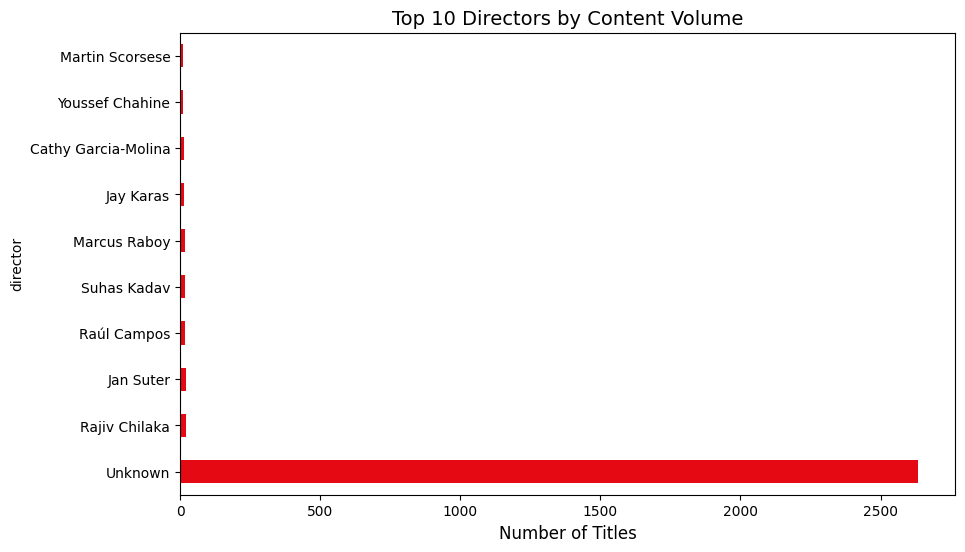

In [20]:
# Clean and count directors
director_counts = df['director'].str.split(', ').explode().value_counts().head(10)

# Horizontal bar chart
director_counts.plot(kind='barh', color='#E50914', figsize=(10,6))
plt.title('Top 10 Directors by Content Volume', fontsize=14)
plt.xlabel('Number of Titles', fontsize=12)
plt.show()

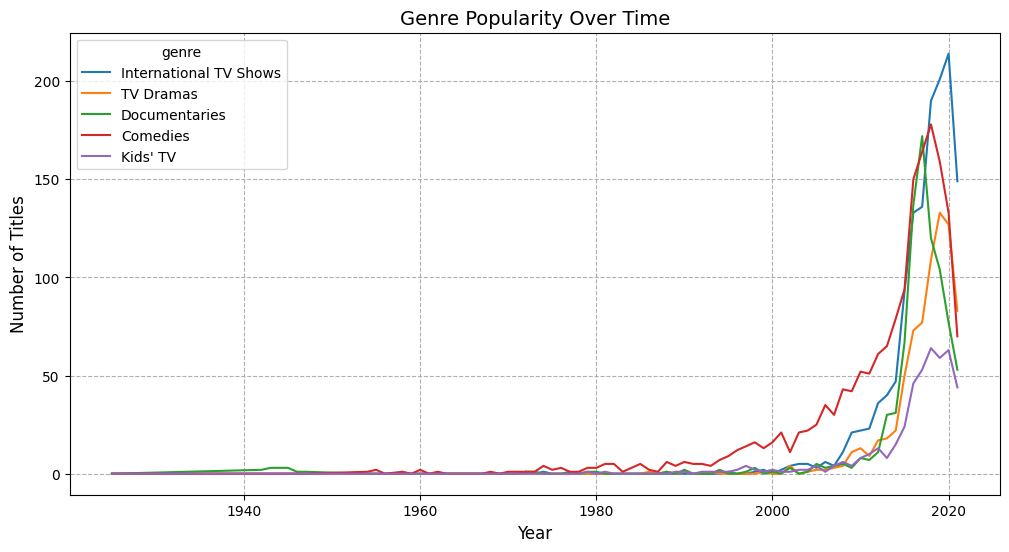

In [21]:
# Extract year and genres
genre_yearly = df.assign(genre=df['listed_in'].str.split(', ')).explode('genre')
genre_trend = genre_yearly.groupby(['release_year', 'genre']).size().unstack().fillna(0)

# Plot top 5 genres
genre_trend[['International TV Shows', 'TV Dramas', 'Documentaries', 'Comedies', 'Kids\' TV']].plot(figsize=(12,6))
plt.title('Genre Popularity Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.grid(linestyle='--')
plt.show()

In [16]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: squarify in c:\users\dell\appdata\local\programs\python\python313\lib\site-packages (0.4.4)




[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import squarify

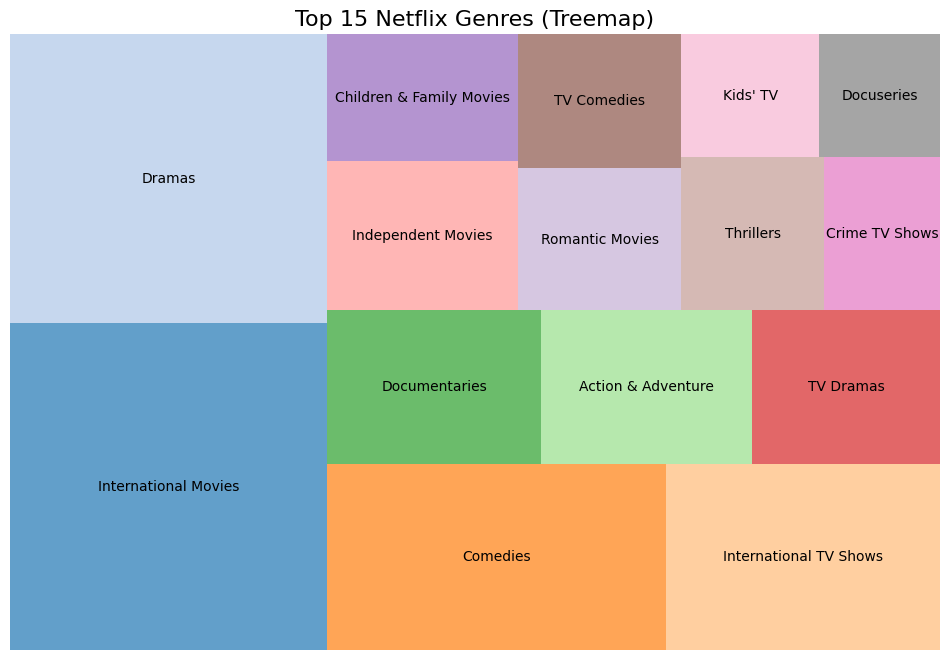

In [18]:
# Split and count genres
all_genres = df['listed_in'].str.split(', ').explode()
top_genres = all_genres.value_counts().head(15)

# Treemap
plt.figure(figsize=(12,8))
squarify.plot(sizes=top_genres.values, label=top_genres.index, 
              color=plt.cm.tab20.colors, alpha=0.7)
plt.title('Top 15 Netflix Genres (Treemap)', fontsize=16)
plt.axis('off')
plt.show()

In [19]:
x = df.groupby(['rating']).size().reset_index(name='counts')
print(x)

      rating  counts
0     66 min       1
1     74 min       1
2     84 min       1
3          G      41
4      NC-17       3
5         NR      80
6         PG     287
7      PG-13     490
8          R     799
9      TV-14    2160
10      TV-G     220
11     TV-MA    3207
12     TV-PG     863
13      TV-Y     307
14     TV-Y7     334
15  TV-Y7-FV       6
16        UR       3


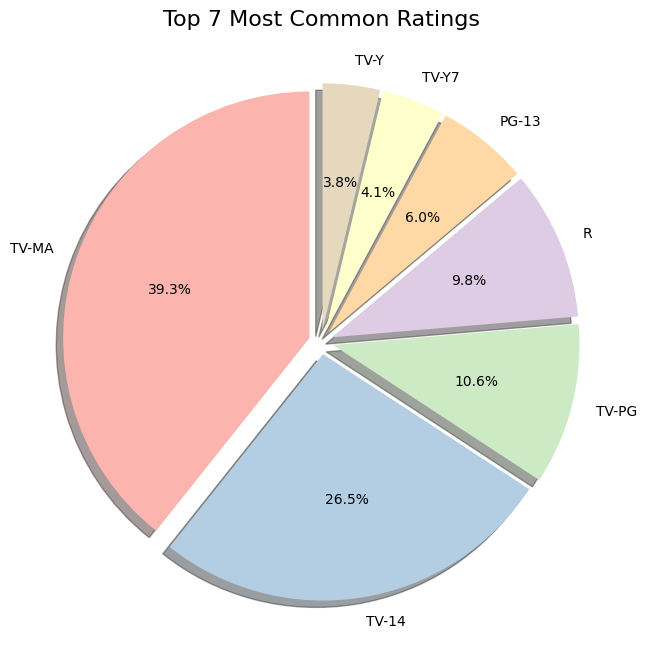

In [22]:
# Assuming df is your DataFrame with a 'rating' column
rating_counts = df['rating'].value_counts().head(7)

# Create pie chart
plt.figure(figsize=(8, 8))
rating_counts.plot(kind='pie', 
                  autopct='%1.1f%%',
                  startangle=90,
                  shadow=True,
                  explode=[0.05]*len(rating_counts),  # Slightly separate slices
                  colors=plt.cm.Pastel1.colors)  # Using a nice color scheme

plt.title('Top 7 Most Common Ratings', fontsize=16)
plt.ylabel('')  # Remove the default y-label
plt.show()

#Analyzing the top 5 Directors on Netflix

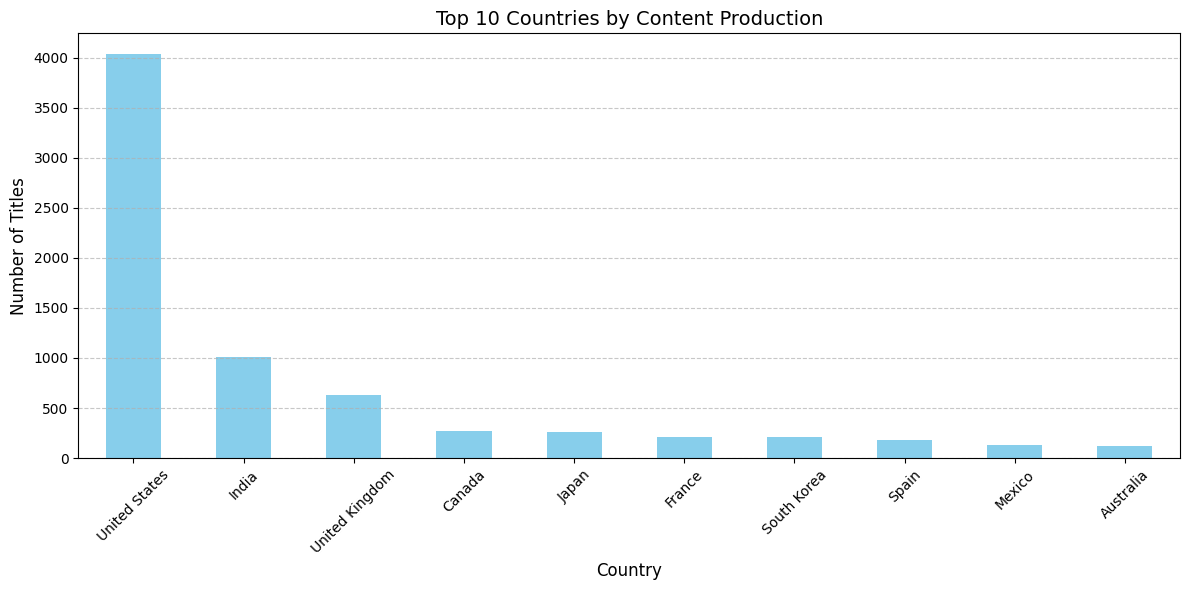

In [23]:
# Clean country data (some entries may have multiple countries)
df['primary_country'] = df['country'].str.split(',').str[0].str.strip()

# Get top 10 countries
top_countries = df['primary_country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Content Production', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Analyzing the content produced on netflix based on years

In [24]:
df1 = df[['type', 'release_year']]
df1 = df1.rename(columns = {"release_year":"Release Year", "type": "Type"})
df2 = df1.groupby(['Release Year', 'Type']).size().reset_index(name='Total Count')

In [25]:
print(df2)

     Release Year     Type  Total Count
0            1925  TV Show            1
1            1942    Movie            2
2            1943    Movie            3
3            1944    Movie            3
4            1945    Movie            3
..            ...      ...          ...
114          2019  TV Show          397
115          2020    Movie          517
116          2020  TV Show          436
117          2021    Movie          277
118          2021  TV Show          315

[119 rows x 3 columns]


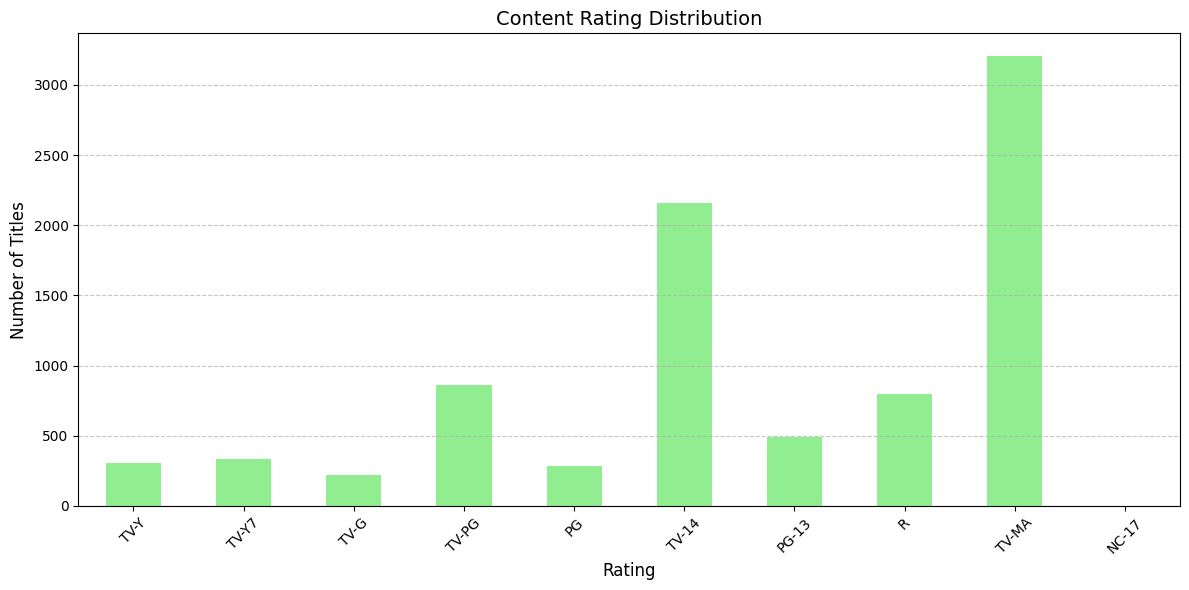

In [26]:
# Clean rating data
rating_order = ['TV-Y', 'TV-Y7', 'TV-G', 'TV-PG', 'PG', 'TV-14', 'PG-13', 'R', 'TV-MA', 'NC-17']
rating_counts = df['rating'].value_counts().loc[rating_order]

plt.figure(figsize=(12, 6))
rating_counts.plot(kind='bar', color='lightgreen')
plt.title('Content Rating Distribution', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

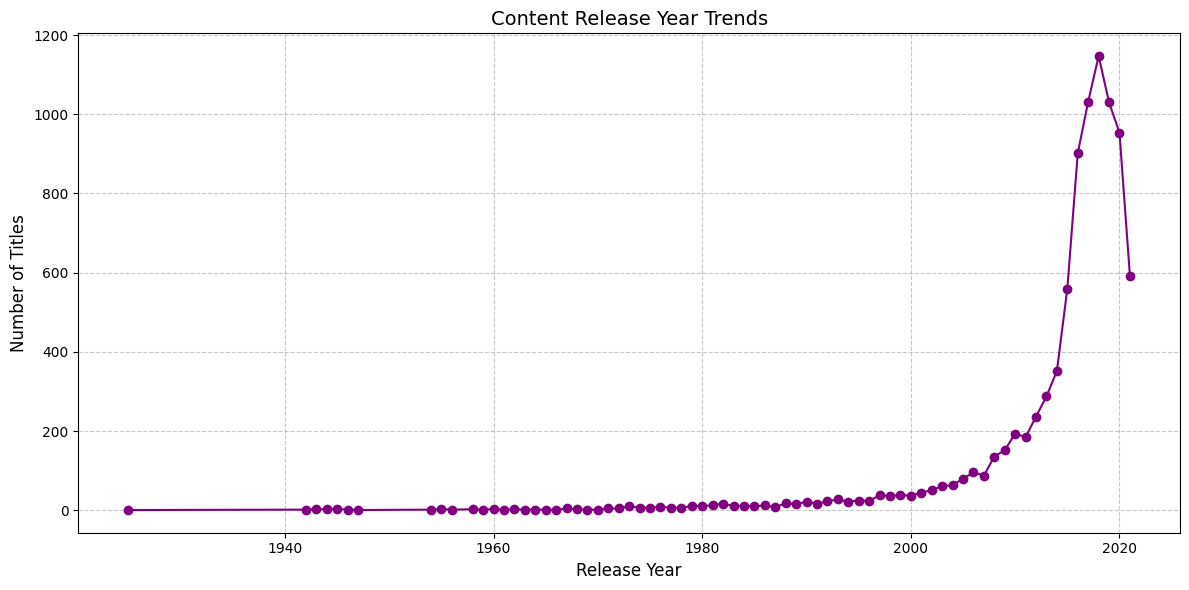

In [27]:
# Group by release year
yearly_counts = df.groupby('release_year')['show_id'].count()

plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='line', marker='o', color='purple')
plt.title('Content Release Year Trends', fontsize=14)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_7140\3077434035.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([movies['duration_num'].dropna(),


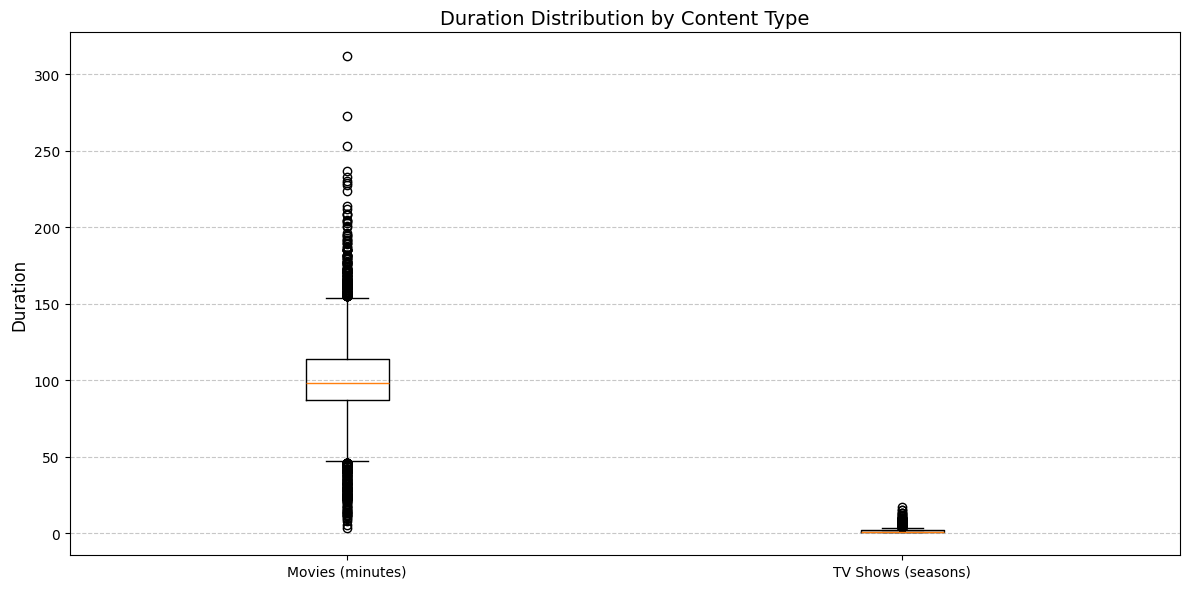

In [28]:
# Separate movies and TV shows
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

plt.figure(figsize=(12, 6))
plt.boxplot([movies['duration_num'].dropna(), 
             tv_shows['duration_num'].dropna()],
            labels=['Movies (minutes)', 'TV Shows (seasons)'])
plt.title('Duration Distribution by Content Type', fontsize=14)
plt.ylabel('Duration', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Conclusion

This comprehensive analysis of Netflix's content library reveals key trends about the platform's global strategy and viewer preferences:

1. *Content Explosion*: Netflix has dramatically increased its content production since 2015, with particularly strong growth in International TV Shows and Documentaries.

2. *Genre Dominance*: International content and mature-rated programming (TV-MA) dominate the platform, reflecting Netflix's focus on adult audiences and global expansion.

3. *Production Patterns*: The United States remains the largest content producer, but emerging markets like India and South Korea are playing increasingly important roles in Netflix's catalog.

4. *Strategic Releases*: Content additions peak during Q4 (October-December), aligning with holiday viewing habits and awards season considerations.

5. *Creative Leadership*: A core group of prolific directors, particularly in international markets, drives much of Netflix's original content production.